In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hrt = pd.read_csv('heart_dis.csv',header=None)
df_hrt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
df_hrt.columns =['Age','Sex','cp','Trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df_hrt

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
df_hrt.dtypes

Age          int64
Sex          int64
cp           int64
Trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

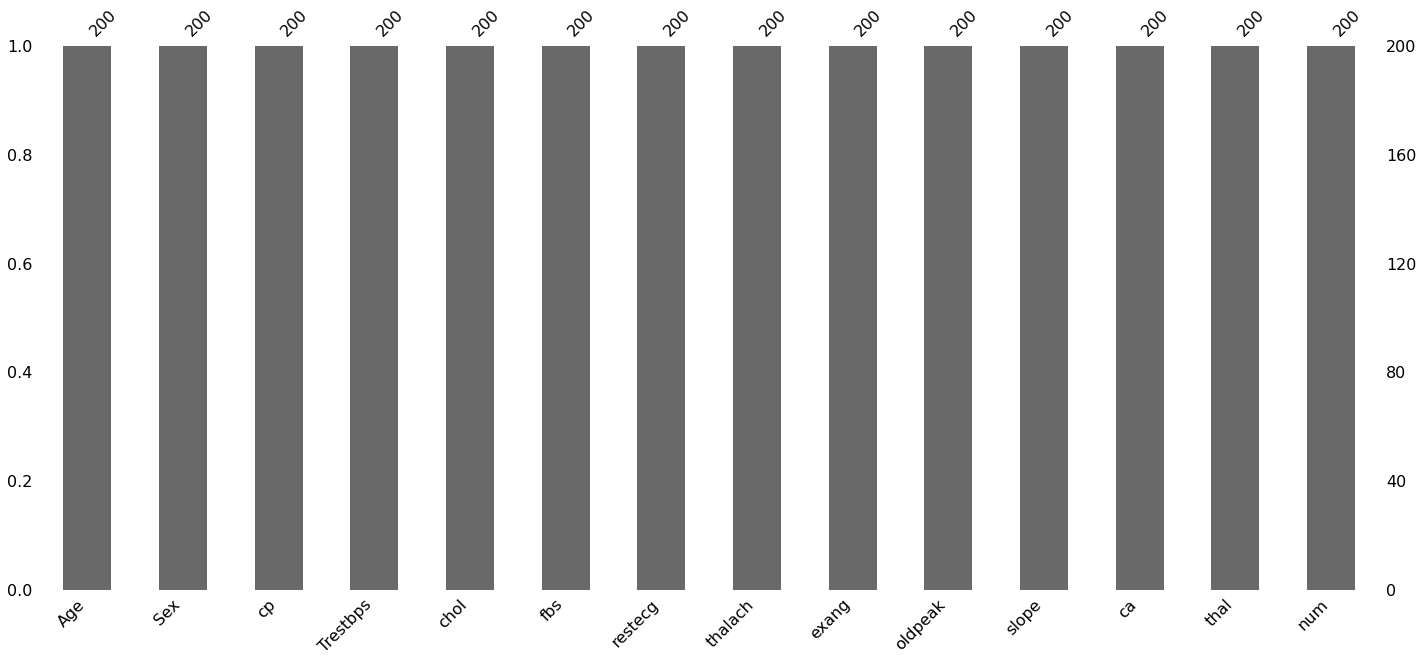

In [5]:
import missingno as msno
msno.bar(df_hrt)

In [6]:
#As we can see that there are some '?' and are not shown as 'NAN' values
for col in df_hrt.columns:
    if df_hrt[col].dtypes == 'object':
        df_hrt[col] = df_hrt[col].replace('?',np.nan)
        df_hrt[col] = df_hrt[col].replace('?',np.nan)

df_hrt

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


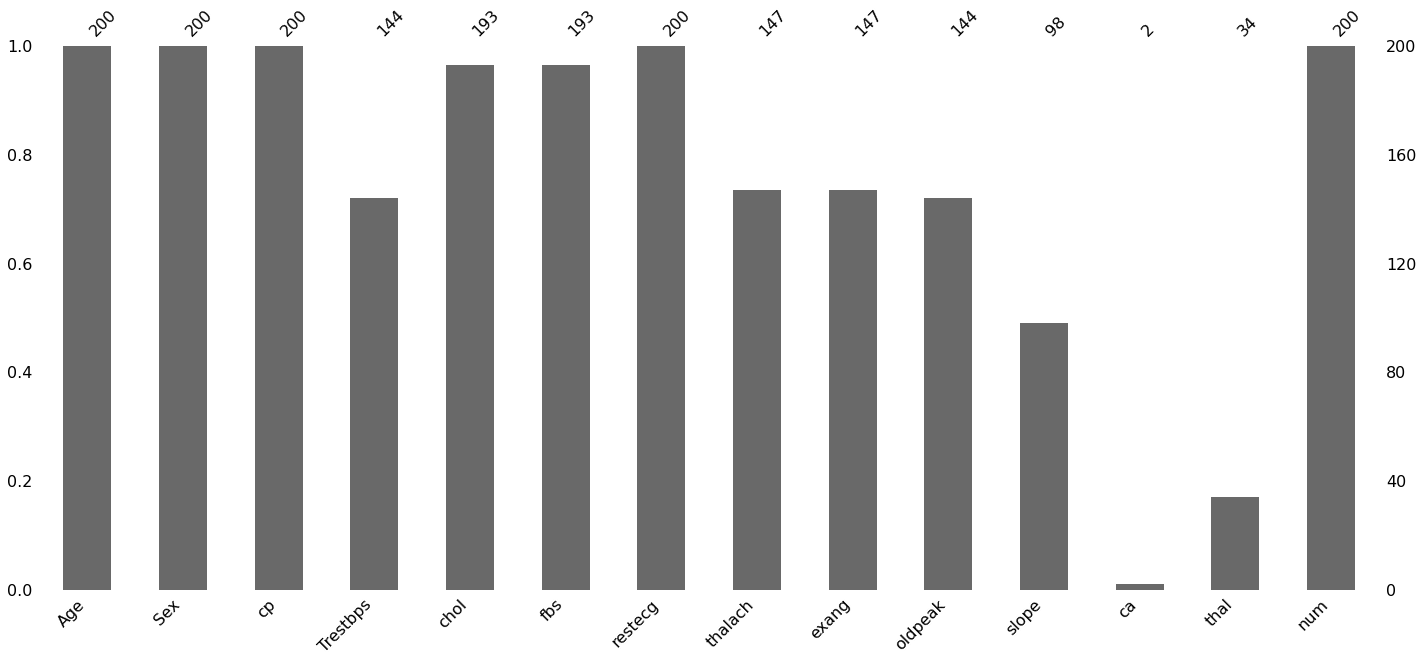

In [7]:
#checking missing values 
msno.bar(df_hrt)

In [8]:
#We will drop 'ca','thal' and 'slope' as very less values available
df_hrt.drop(columns=['ca','thal','slope'],inplace=True)

In [9]:
for col in df_hrt.columns:
    print(col,' *********\n',df_hrt[col].value_counts(),'\n\n\n')

Age  *********
 63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: Age, dtype: int64 



Sex  *********
 1    194
0      6
Name: Sex, dtype: int64 



cp  *********
 4    131
3     47
2     14
1      8
Name: cp, dtype: int64 



Trestbps  *********
 120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
170     4
124     4
136     4
134     4
144     4
126     4
128     4
132     3
158     3
138     2
155     2
180     2
154     2
152     2
104     2
125     2
112     2
116     2
96      1
106     1
100     1
146     1
118     1
190     1
114     1
135     1
178     1
156     1
102     1
127     1
172     1
0       1
Name: Trestbps, dtype: int64 



chol  *****

In [10]:
df_hrt.chol.value_counts()
#Column 'chol' is 'Serum Cholestrol Level' and cannot be equal to 0 which in the dataset is there for 25% of data

0      49
258     4
220     4
203     4
218     3
       ..
198     1
165     1
142     1
139     1
308     1
Name: chol, Length: 99, dtype: int64

In [11]:
#Replacing '0' with mean value of the dataset
df_hrt['chol'] = df_hrt['chol'].replace('0',np.nan)
df_hrt['Trestbps'] = df_hrt['Trestbps'].replace('0',np.nan)

In [12]:
from sklearn.impute import SimpleImputer

si_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
si_median = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

lmean = ['Trestbps','chol','thalach','oldpeak']
lmedian = ['fbs','restecg','exang']

for col1 in lmean:
    df_hrt[col1] = si_mean.fit_transform(df_hrt[col1].to_frame())
for col2 in lmedian:
    df_hrt[col2] = si_median.fit_transform(df_hrt[col2].to_frame())
    
df_hrt.isnull().sum()

Age         0
Sex         0
cp          0
Trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [13]:
#Now since the finally we want to distinguish possible heart disease patient so convert the target variable multiple 
#values into binary values
df_hrt.dtypes

Age           int64
Sex           int64
cp            int64
Trestbps    float64
chol        float64
fbs          object
restecg       int64
thalach     float64
exang        object
oldpeak     float64
num           int64
dtype: object

In [14]:
list1 = ['fbs','exang']
for i in list1:
    df_hrt[i] = df_hrt[i].astype('float')
    
df_hrt.dtypes

Age           int64
Sex           int64
cp            int64
Trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
num           int64
dtype: object

In [15]:
#Now all datatypes also converted so we'll change final column values making it a classification problem
df_hrt.num = df_hrt.num.replace([1,2,3,4],1)

In [16]:
df_hrt

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.0,3.000000,1
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.0,0.000000,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.0,1.500000,1
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.0,2.500000,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.0,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.0,0.000000,1
196,62,1,1,134.699301,139.0,0.0,1,122.795918,1.0,1.320833,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.0,0.000000,1
198,58,1,4,134.699301,385.0,1.0,2,122.795918,1.0,1.320833,0


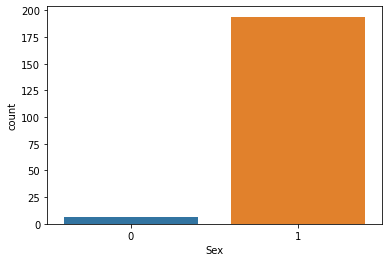

In [17]:
#Now data frame is ready but let's visualize some other factors
sns.countplot(x='Sex',data=df_hrt)

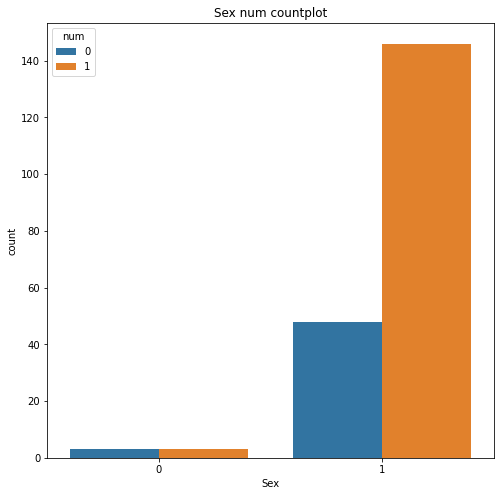

In [18]:
plt.figure(figsize=(8,8))
plt.title('Sex num countplot')
sns.countplot(x='Sex', hue='num', data=df_hrt)
plt.show()

In [19]:
#We can see we have many cases for male(1) but few for female(0)
#In female, ratio of people having heart disease is low whereas in males it is quiet large
#Males are more prone to  heart disease



************


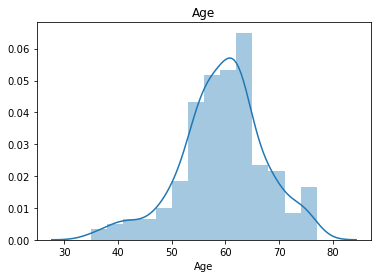







************


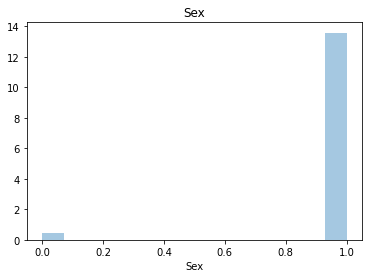







************


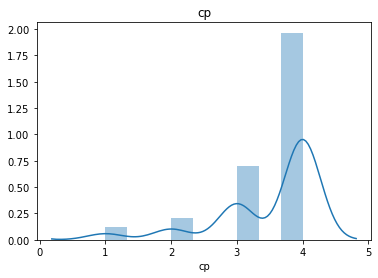







************


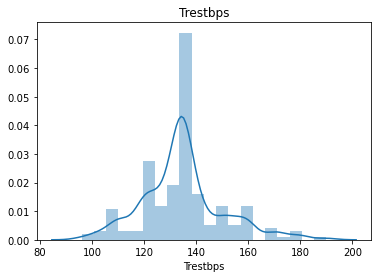







************


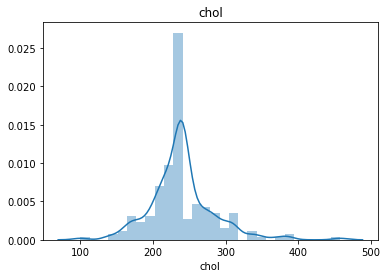







************


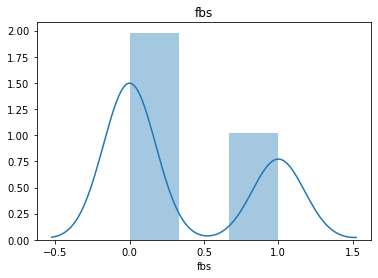







************


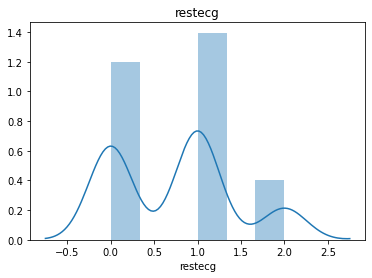







************


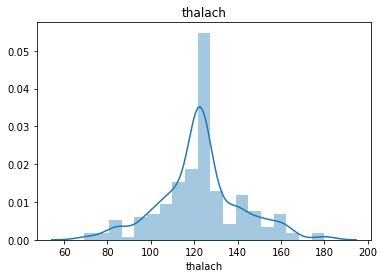







************


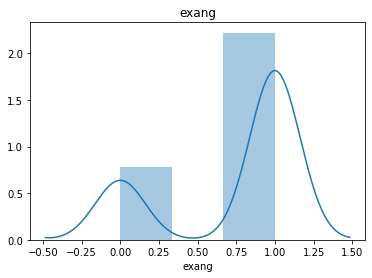







************


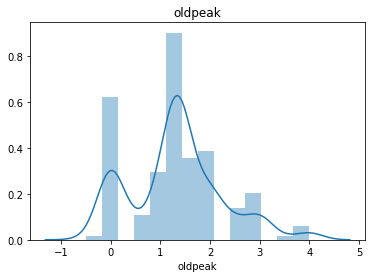







************


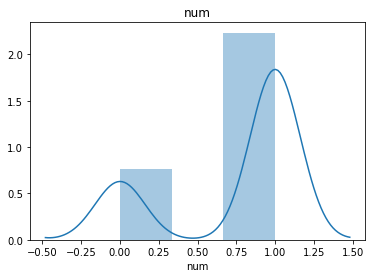

In [20]:
#Distribution plot for all factors
for col in df_hrt.columns:
    print('\n\n************')
    plt.title(col)
    sns.distplot(df_hrt[col])
    plt.show()
    print('\n\n\n')

In [21]:
df_hrt.describe()

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,134.699301,239.569444,0.340000,0.735000,122.795918,0.740000,1.320833,0.745000
std,7.811697,0.171015,0.795701,15.581859,44.748954,0.474898,0.683455,18.835692,0.439735,0.937755,0.436955
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,126.000000,217.000000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,134.699301,239.569444,0.000000,1.000000,122.795918,1.000000,1.320833,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,1.000000


In [22]:
#Average age of patient is near 60
#Average cholestrol level is near 240 which is still above the average range hence high probability of finding patients

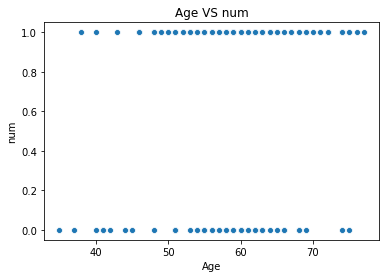

In [23]:
#Plots for age 
plt.title('Age VS num')
sns.scatterplot(x='Age',y='num',data=df_hrt)
plt.show()

#As Age increases, risk of having a heart disease gets increased

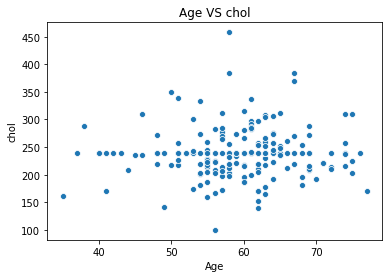

In [24]:
plt.title('Age VS chol')
sns.scatterplot(x='Age',y='chol',data=df_hrt)
plt.show()

#Cannot see a good pattern here, but b\w range 50 to 65 years chol level varies a lot 

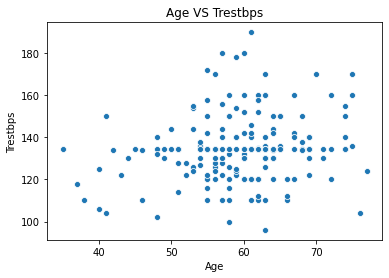

In [25]:
plt.title('Age VS Trestbps')
sns.scatterplot(x='Age',y='Trestbps',data=df_hrt)
plt.show()

#This again does not have a good relation 

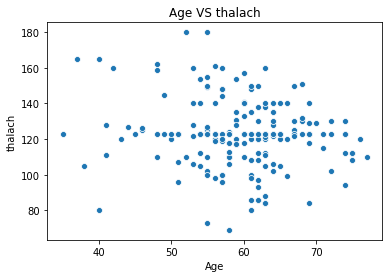

In [26]:
plt.title('Age VS thalach')
sns.scatterplot(x='Age',y='thalach',data=df_hrt)
plt.show()

#Can't see a pattern here as well

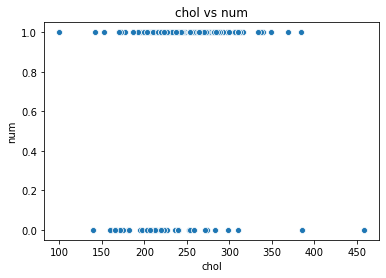

In [27]:
#Cholestrol Level

plt.title('chol vs num')
sns.scatterplot(x='chol',y='num',data=df_hrt)
plt.show()
#We can see that 'num' does not follow a particular relationship with 'chol'

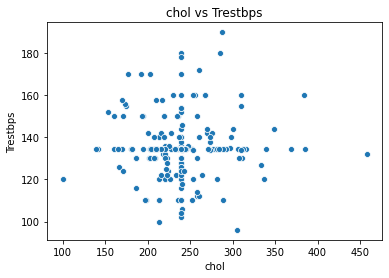

In [28]:
plt.title('chol vs Trestbps')
sns.scatterplot(x='chol',y='Trestbps',data=df_hrt)
plt.show()

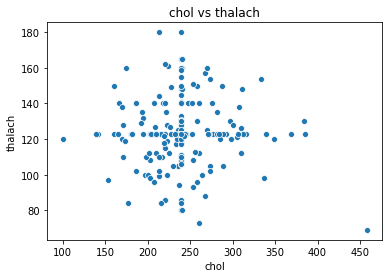

In [29]:
plt.title('chol vs thalach')
sns.scatterplot(x='chol',y='thalach',data=df_hrt)
plt.show()

In [30]:
#Plots for column 'Sex'
def countplot_col(col,hue):
    plt.figure(figsize=(8,8))
    plt.title('Countplot')
    sns.countplot(x=col, hue=hue, data=df_hrt)
    return plt.show()

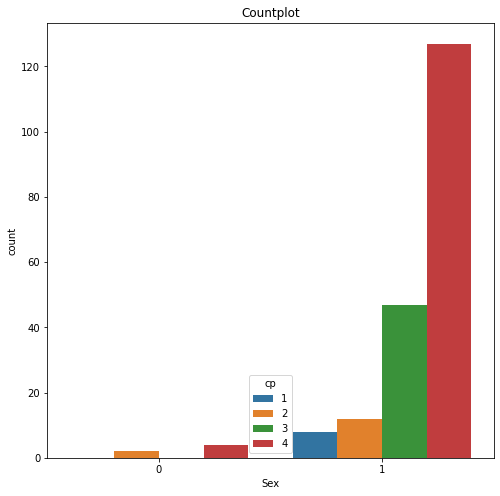

In [31]:
countplot_col('Sex','cp')
# 1--Largest number of patients have cp as 4
# 2--Females have only have cp 2 and 4 

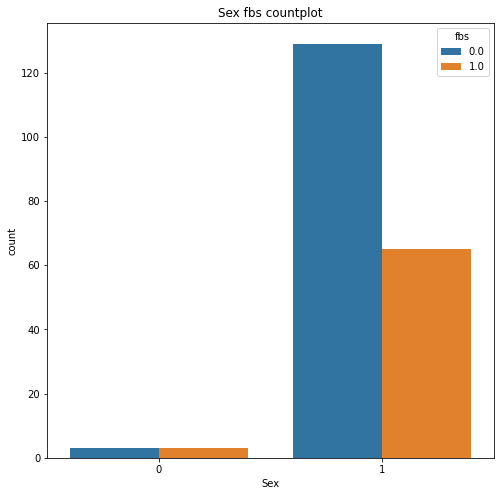

In [32]:
plt.figure(figsize=(8,8))
plt.title('Sex fbs countplot')
sns.countplot(x='Sex', hue='fbs', data=df_hrt)
plt.show()
#Males how more cases of fbs = 0 whereas females shows equal cases of both 

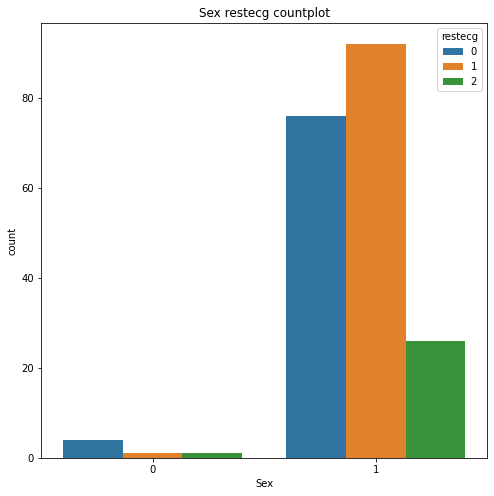

In [33]:
plt.figure(figsize=(8,8))
plt.title('Sex restecg countplot')
sns.countplot(x='Sex', hue='restecg', data=df_hrt)
plt.show()

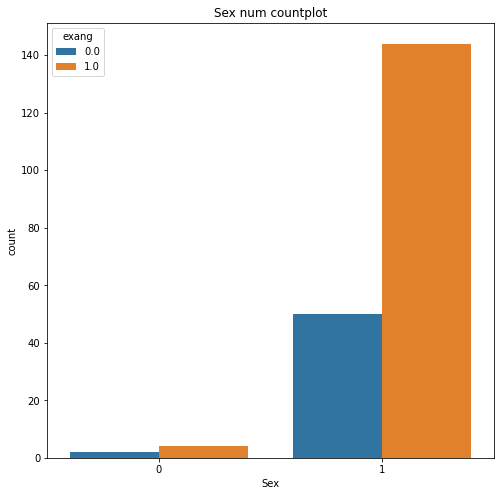

In [34]:
plt.figure(figsize=(8,8))
plt.title('Sex num countplot')
sns.countplot(x='Sex', hue='exang', data=df_hrt)
plt.show()

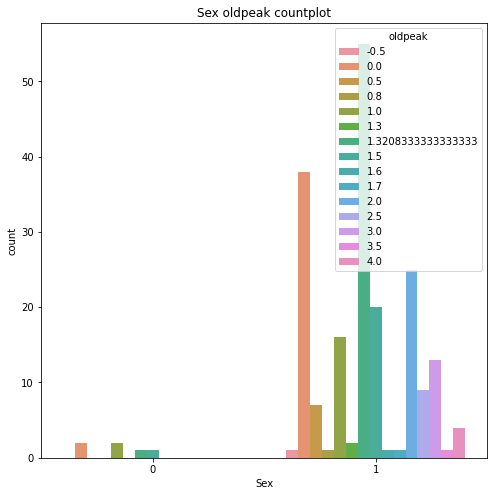

In [35]:
plt.figure(figsize=(8,8))
plt.title('Sex oldpeak countplot')
sns.countplot(x='Sex', hue='oldpeak', data=df_hrt)
plt.show()

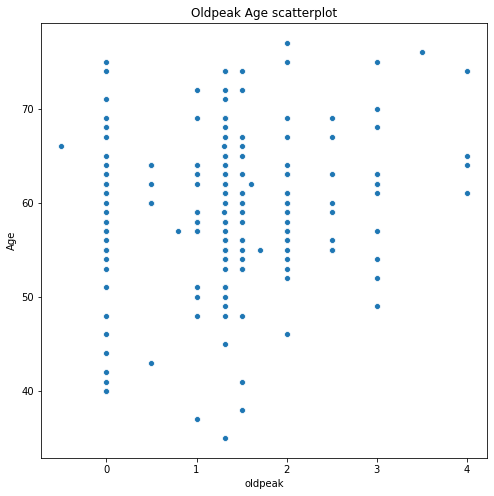

In [36]:
plt.figure(figsize=(8,8))
plt.title('Oldpeak Age scatterplot')
sns.scatterplot(x='oldpeak', y='Age', data=df_hrt)
plt.show()

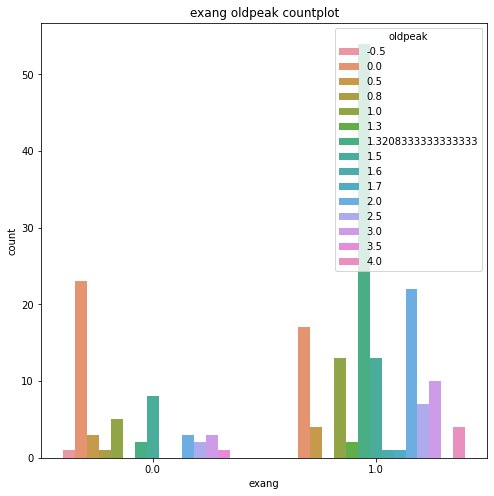

In [37]:
plt.figure(figsize=(8,8))
plt.title('exang oldpeak countplot')
sns.countplot(x='exang', hue='oldpeak', data=df_hrt)
plt.show()

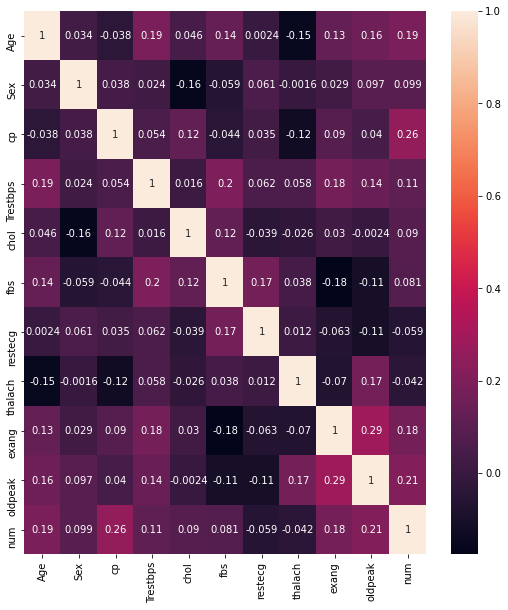

In [38]:
hmap_corr = df_hrt.corr()
plt.figure(figsize=(9,10))
sns.heatmap(df_hrt.corr(),annot=True)
plt.show()

In [39]:
#NUM has a good positive co-relation with OLDPEAK and CP
#NUM has negative co-relation with only 'restecg' and 'thalach'

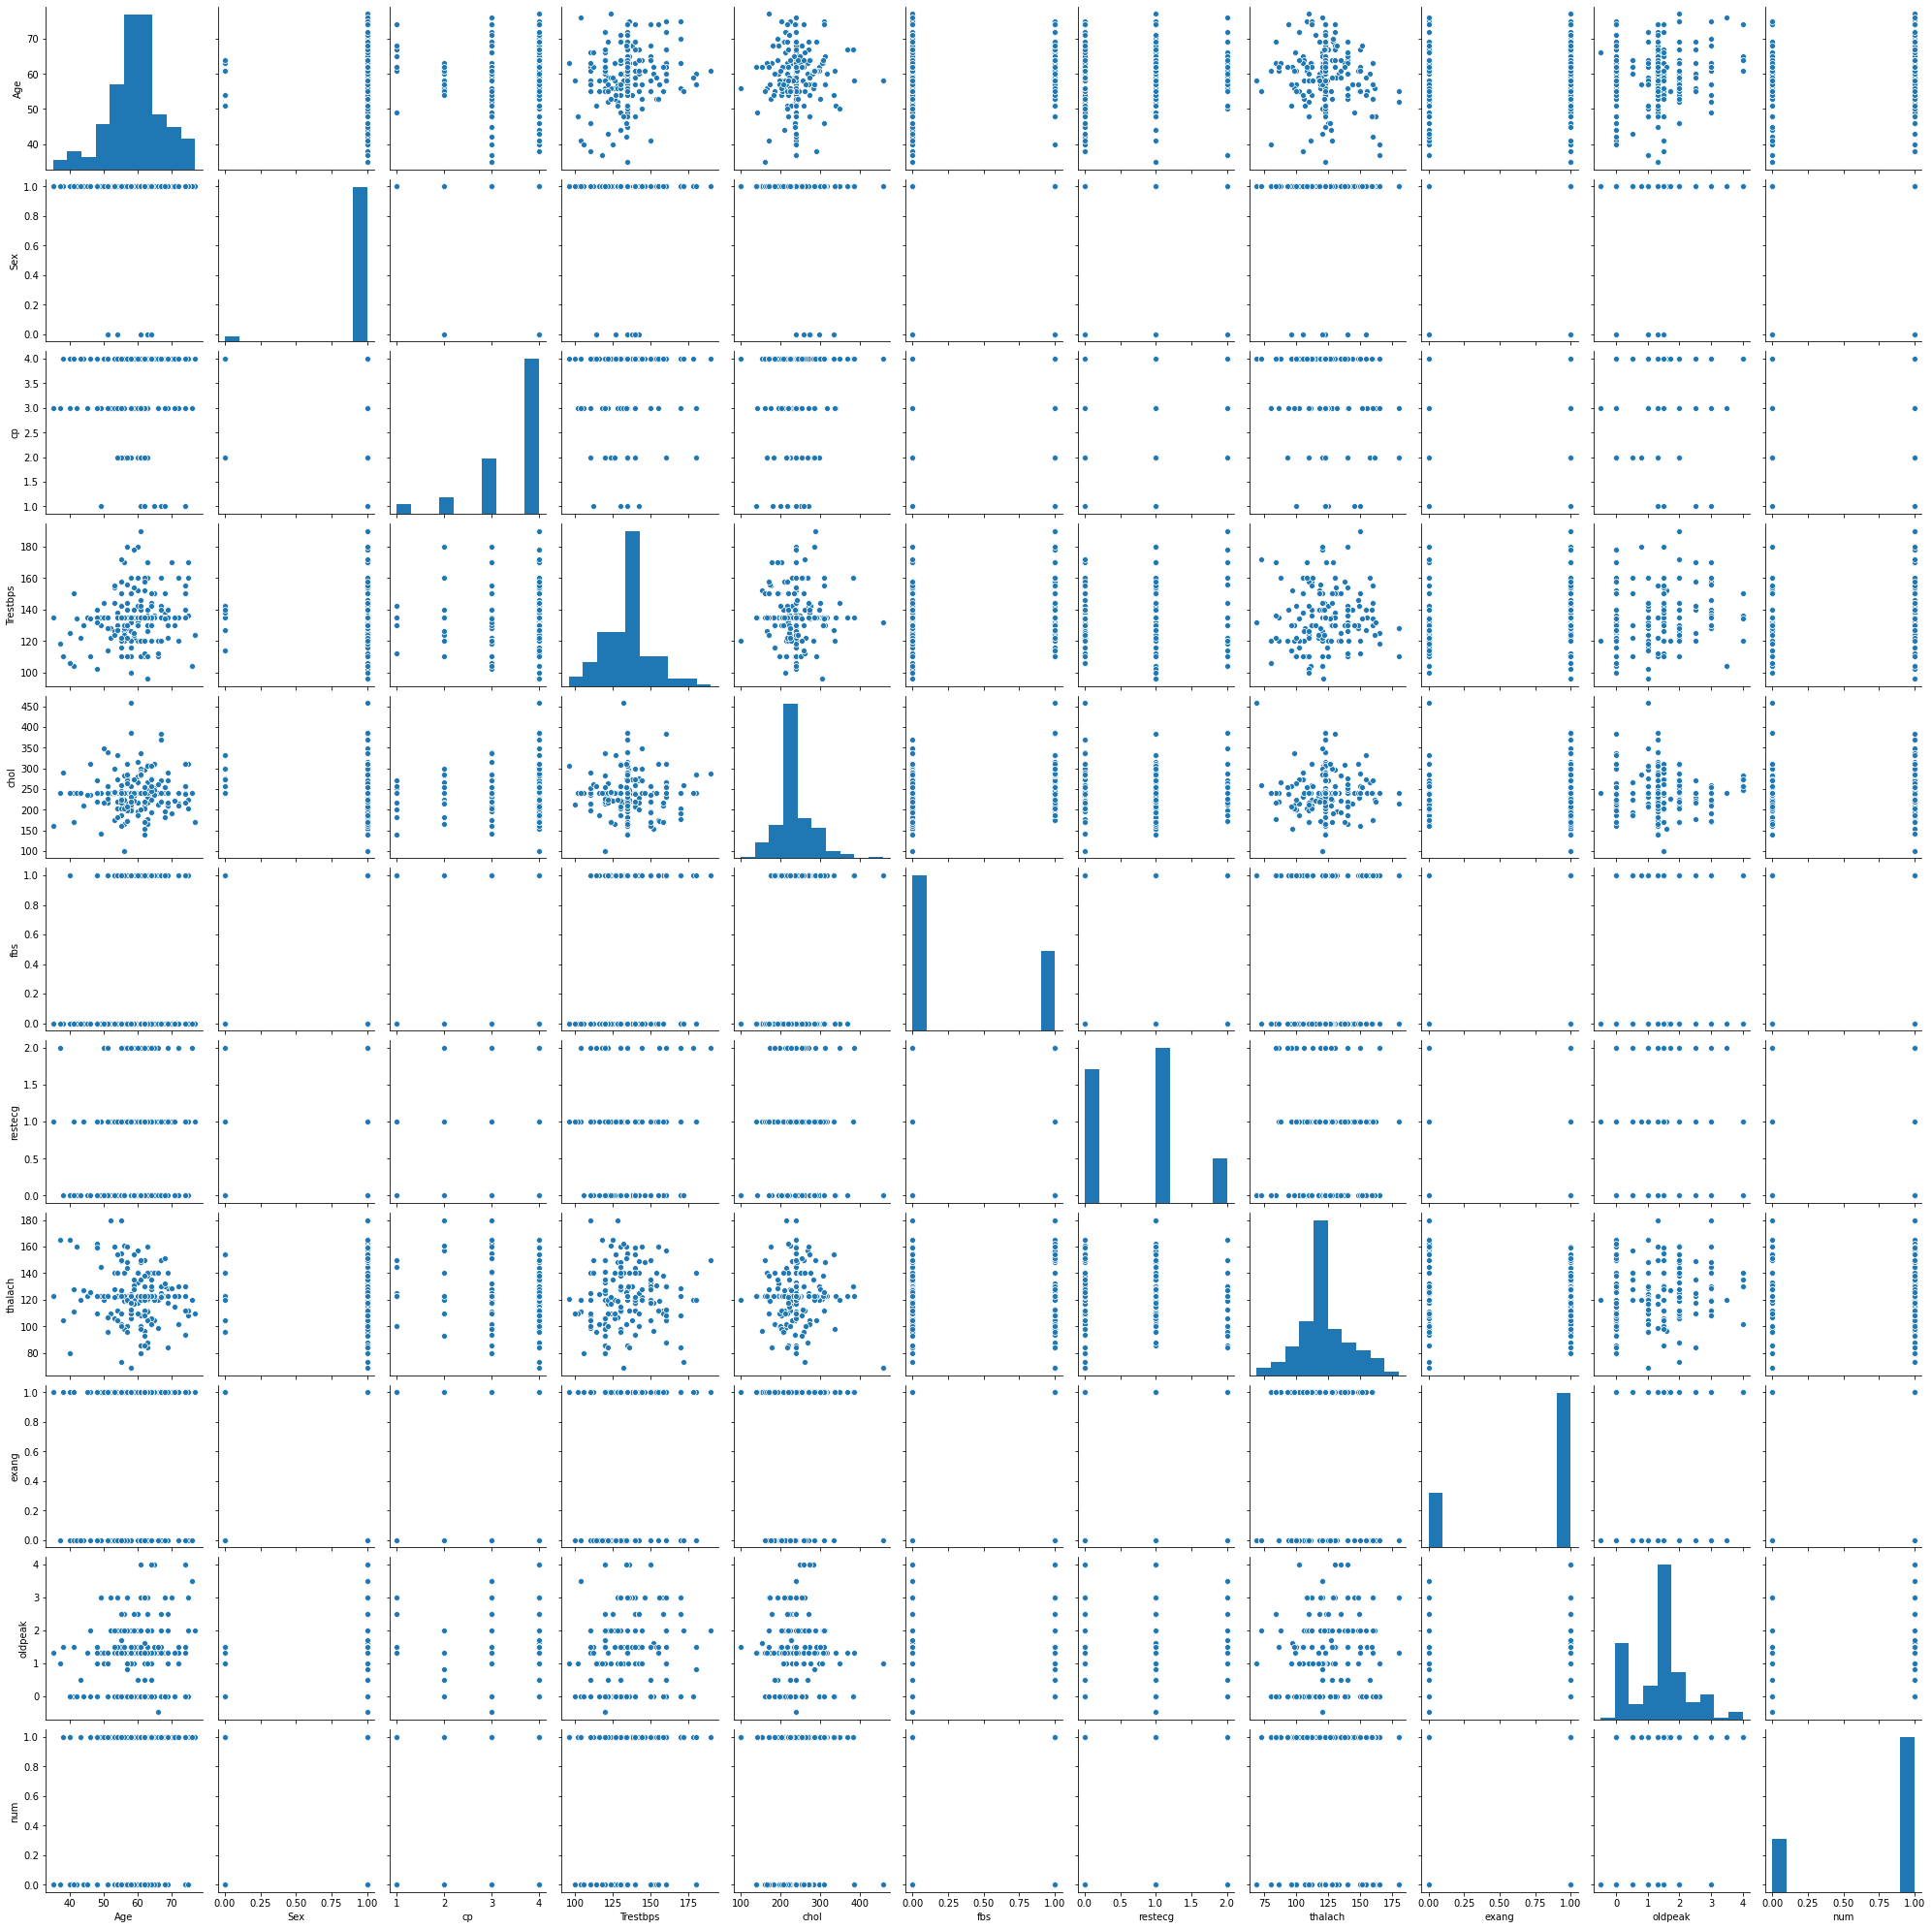

In [40]:
sns.pairplot(df_hrt)

In [41]:
#Now visualization is done so we will move on to removing outliers from the dataset

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df_hrt))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 1.79511750e+00, 5.85048613e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.68705478e+00, 1.41204031e+00, 1.70925967e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 1.91538592e-01, 5.85048613e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.68705478e+00, 1.41204031e+00, 5.85048613e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 2.37377363e-16, 1.70925967e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        5.92748978e-01, 1.41204031e+00, 5.85048613e-01]])

In [43]:
np.where(z>3)

(array([ 24,  28,  51,  66,  70,  72,  76,  79,  80,  82,  96,  97, 126,
        128, 131, 133, 137, 176, 190, 195, 196, 198], dtype=int64),
 array([7, 4, 1, 2, 7, 2, 2, 1, 4, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 4],
       dtype=int64))

In [44]:
df_new = df_hrt[(z<3).all(axis=1)]
df_new

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.0,300.0,1.0,1,128.0,1.0,1.5,1
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,1
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,1


In [45]:
#removing skewness is removing all the rows of female patients so we will not remove outliers and proceed
for col in df_new.columns:
    print(col,'******\n\n\n',df_new[col].value_counts())


Age ******


 63    14
55    13
62    13
60    12
57    10
58    10
61     9
69     8
56     8
59     8
64     8
51     6
54     5
53     5
65     5
48     4
74     4
72     3
68     3
66     3
75     3
67     3
46     2
50     2
40     2
41     2
71     2
44     1
42     1
38     1
43     1
77     1
45     1
49     1
52     1
76     1
70     1
37     1
Name: Age, dtype: int64
Sex ******


 1    178
Name: Sex, dtype: int64
cp ******


 4    122
3     45
2     11
Name: cp, dtype: int64
Trestbps ******


 134.699301    50
120.000000    15
130.000000    14
150.000000     9
140.000000     9
110.000000     8
160.000000     7
122.000000     6
126.000000     4
170.000000     4
134.000000     4
136.000000     4
124.000000     4
144.000000     4
158.000000     3
128.000000     3
142.000000     2
132.000000     2
180.000000     2
152.000000     2
116.000000     2
154.000000     2
125.000000     2
104.000000     2
155.000000     2
118.000000     1
138.000000     1
178.000000     1
146.000000     

In [46]:
#Checking skewness
df_hrt.skew()

Age        -0.404091
Sex        -5.552105
cp         -1.648734
Trestbps    0.597868
chol        0.928177
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
num        -1.132724
dtype: float64

In [47]:
#Removing skewness
#We will only remove skewness in those columns where we are seeing continous values
#Because very less data set available and the removing skewness will change the data values 

#*********************
#We will do this process for whole datset and then we'll check the values
#*********************

#lst = ['Age','Trestbps','chol','thalach']

#***********************************************************************************

lst = list(df_hrt.columns)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for col in lst:
    if df_hrt.loc[:,col].skew() > 0.55 or df_hrt.loc[:,col].skew() < -0.55 :
        if col != 'num':
            df_hrt[col] = pt.fit_transform(df_hrt[col].to_frame())


df_hrt.skew()

Age        -0.404091
Sex        -5.552105
cp         -0.771030
Trestbps   -0.008331
chol        0.044155
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
num        -1.132724
dtype: float64

In [48]:
#Let's transform the data after dividing the 'x' and 'y' values 
x = df_hrt.iloc[:,:-1]
x

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,63,0.175863,0.713405,0.411240,0.516471,-0.717741,1,112.000000,0.592749,3.000000
1,44,0.175863,0.713405,-0.238843,-0.662451,-0.717741,1,127.000000,-1.687055,0.000000
2,60,0.175863,0.713405,-0.103722,-0.440435,-0.717741,1,140.000000,0.592749,1.500000
3,55,0.175863,0.713405,0.534017,-0.201336,-0.717741,1,149.000000,0.592749,2.500000
4,66,0.175863,-1.142129,-1.758668,-0.562947,1.393261,2,99.000000,0.592749,1.300000
...,...,...,...,...,...,...,...,...,...,...
195,54,-5.686241,0.713405,-0.446682,1.943277,1.393261,1,154.000000,-1.687055,0.000000
196,62,0.175863,-1.898745,0.074476,-2.678853,-0.717741,1,122.795918,0.592749,1.320833
197,55,0.175863,0.713405,-0.807685,-0.319924,1.393261,1,100.000000,-1.687055,0.000000
198,58,0.175863,0.713405,0.074476,2.827267,1.393261,2,122.795918,0.592749,1.320833


In [49]:
y = df_hrt.loc[:,'num']
y

0      1
1      0
2      1
3      1
4      0
      ..
195    1
196    0
197    1
198    0
199    1
Name: num, Length: 200, dtype: int64

In [51]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(RandomForestClassifier(), 6)
rfe = rfe.fit(x, y)

x.columns[rfe.get_support()]

Index(['Age', 'cp', 'Trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [54]:
#SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif
SKB = SelectKBest(f_classif, k=6).fit(x, y )

x.columns[SKB.get_support()]

Index(['Age', 'cp', 'Trestbps', 'chol', 'exang', 'oldpeak'], dtype='object')

In [57]:
x_try = x.drop(columns = ['restecg','thalach'])

#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(x_try.values,i) for i in range(x_try.shape[1])]
VIF = pd.Series(VIF, name='VIF')
cols = pd.Series(x_try.columns, name='Column_Name')
VIF_res = pd.concat([cols,VIF],axis=1)
VIF_8 = VIF_res.sort_values(by=['VIF'], ascending = False)
VIF_8

,Column_Name,VIF
7,oldpeak,3.395023
0,Age,3.274597
6,exang,1.158778
5,fbs,1.128558
3,Trestbps,1.116137
4,chol,1.054622
1,Sex,1.036911
2,cp,1.024256


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x

array([[ 4.68420533e-01,  1.75863115e-01,  7.13404853e-01, ...,
        -5.74601115e-01,  5.92748978e-01,  1.79511750e+00],
       [-1.96993293e+00,  1.75863115e-01,  7.13404853e-01, ...,
         2.23757712e-01, -1.68705478e+00, -1.41204031e+00],
       [ 8.34173552e-02,  1.75863115e-01,  7.13404853e-01, ...,
         9.15668696e-01,  5.92748978e-01,  1.91538592e-01],
       ...,
       [-5.58254608e-01,  1.75863115e-01,  7.13404853e-01, ...,
        -1.21328818e+00, -1.68705478e+00, -1.41204031e+00],
       [-1.73251430e-01,  1.75863115e-01,  7.13404853e-01, ...,
         0.00000000e+00,  5.92748978e-01,  2.37377363e-16],
       [ 3.40086140e-01,  1.75863115e-01, -1.75614513e+00, ...,
        -1.58585563e+00,  5.92748978e-01, -1.41204031e+00]])

In [53]:
X = pd.DataFrame(df_x,columns=x.columns)
X

,Age,Sex,cp,Trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,0.468421,0.175863,0.713405,0.411240,0.516471,-0.717741,0.388709,-0.574601,0.592749,1.795117e+00
1,-1.969933,0.175863,0.713405,-0.238843,-0.662451,-0.717741,0.388709,0.223758,-1.687055,-1.412040e+00
2,0.083417,0.175863,0.713405,-0.103722,-0.440435,-0.717741,0.388709,0.915669,0.592749,1.915386e-01
3,-0.558255,0.175863,0.713405,0.534017,-0.201336,-0.717741,0.388709,1.394684,0.592749,1.260591e+00
4,0.853424,0.175863,-1.142129,-1.758668,-0.562947,1.393261,1.855535,-1.266512,0.592749,-2.227193e-02
...,...,...,...,...,...,...,...,...,...,...
195,-0.686589,-5.686241,0.713405,-0.446682,1.943277,1.393261,0.388709,1.660804,-1.687055,-1.412040e+00
196,0.340086,0.175863,-1.898745,0.074476,-2.678853,-0.717741,0.388709,0.000000,0.592749,2.373774e-16
197,-0.558255,0.175863,0.713405,-0.807685,-0.319924,1.393261,0.388709,-1.213288,-1.687055,-1.412040e+00
198,-0.173251,0.175863,0.713405,0.074476,2.827267,1.393261,1.855535,0.000000,0.592749,2.373774e-16


In [54]:
#MODEL TESTING

y.unique()
y.value_counts()

1    149
0     51
Name: num, dtype: int64

In [60]:
#Since this is classification problem so we will proceed accordingly

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [58]:
x_train, x_test,y_train,y_test = train_test_split(x_try,y,test_size=0.25,random_state=44)

In [61]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    pred_train = accuracy_score(y_train,m.predict(x_train))
    print(m,'\n accuracy score : ',acc_score,'Train Score :',pred_train,'\n\n\n')

LogisticRegression() 
 accuracy score :  0.74 Train Score : 0.8 



DecisionTreeClassifier() 
 accuracy score :  0.64 Train Score : 1.0 



KNeighborsClassifier() 
 accuracy score :  0.76 Train Score : 0.84 



RandomForestClassifier() 
 accuracy score :  0.74 Train Score : 1.0 



SVC() 
 accuracy score :  0.76 Train Score : 0.74 



GradientBoostingClassifier() 
 accuracy score :  0.72 Train Score : 0.9866666666666667 





In [64]:
#Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier are giving the best score
#Let's find the best score by changing random state

def best_acc_random(model):
    acc = 0
    m = 0
    random = 0
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(x_try, y, test_size=0.2, random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        acc_score = accuracy_score(y_test,pred)
        if acc_score > acc:
            acc = acc_score
            m = model
            random = i

    return print('Best acc score : ',acc_score,' for model : ',m,' at random state : ',random)

In [65]:
model_list = [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model_list:
    best_acc_random(i)

Best acc score :  0.7  for model :  LogisticRegression()  at random state :  2
Best acc score :  0.65  for model :  RandomForestClassifier()  at random state :  27
Best acc score :  0.625  for model :  KNeighborsClassifier()  at random state :  65


In [66]:
#Logistic Regression and KNeighborsClassifier are showing better accuracies
#Let's check cross validation score
mlist = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in mlist:
    cvs = cross_val_score(m,x_try,y,cv=5,scoring='accuracy').mean()
    print('Cross val score : ',cvs,'for model ',m)

Cross val score :  0.76 for model  LogisticRegression()
Cross val score :  0.79 for model  RandomForestClassifier()
Cross val score :  0.7449999999999999 for model  GradientBoostingClassifier()


In [67]:
#All are showing good accuracies but let's put in few parameter and check models' accuracies
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=5,scoring='accuracy')
    grd.fit(x_try,y)
    return print('Best parameter for model : ',grd.best_params_,' best score : ', grd.best_score_)

In [68]:
#RandomForestClassifier
rfc = RandomForestClassifier()
params = {
    'n_estimators': list(range(50,460,50)),
    'criterion':['gini','entropy']
}

best_parameter(rfc,params)

Best parameter for model :  {'criterion': 'gini', 'n_estimators': 200}  best score :  0.8299999999999998


In [69]:
#Logistic Regression
lreg = LogisticRegression()
params = {
    'penalty' :['l1', 'l2', 'elasticnet', 'none'],
    'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' :['auto', 'ovr', 'multinomial']
}

best_parameter(lreg,params)

Best parameter for model :  {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'saga'}  best score :  0.775


In [70]:
#KNN
knn = KNeighborsClassifier()
params = {
    'n_neighbors':list(range(3,16,2)),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree', 'kd_tree', 'brute']
}
best_parameter(knn,params)

Best parameter for model :  {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}  best score :  0.77


In [71]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
params = {
    'learning_rate':[0.01,0.1,1],
    'n_estimators':list(range(50,1060,100)),
    'loss':['exponential','deviance']
}

best_parameter(gbc,params)

Best parameter for model :  {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 250}  best score :  0.765


In [74]:
#Ada Boost Classifier
abc = AdaBoostClassifier()
params = {
    'base_estimator':[lreg,rfc],
    'n_estimators':list(range(20,1000,100)),
    'learning_rate':[0.01,0.1,1]
}

best_parameter(abc,params)

Best parameter for model :  {'base_estimator': RandomForestClassifier(), 'learning_rate': 1, 'n_estimators': 20}  best score :  0.8099999999999999


In [73]:
#XGB Classification
from xgboost import XGBClassifier

xgb = XGBClassifier()
params = {
    'n_estimators':list(range(50,410,50)),
    'learning_rate':[0.01,0.1,1],
    'max_depth':list(range(2,21,2)),
    'subsample':[0.2,0.4,0.6,0.8,1.0]
}

best_parameter(xgb,params)

Best parameter for model :  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.6}  best score :  0.7750000000000001


In [78]:
#RandomForestClassifier is giving the best accuracy out of all

abc = AdaBoostClassifier(base_estimator= RandomForestClassifier(),learning_rate=0.1,n_estimators=20)
#xgb = XGBClassifier(learning_rate = 0.01, max_depth = 2, n_estimators = 350, subsample = 0.2)

x_train, x_test,y_train,y_test = train_test_split(x_try,y,test_size=0.25,random_state=44)
abc.fit(x_train,y_train)
pred = abc.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Accuracy Score : ',acc)

cvs = cross_val_score(abc,x_try,y,cv=5,scoring='accuracy').mean()
print('Cross val score : ', cvs)

Accuracy Score :  0.78
Cross val score :  0.7950000000000002


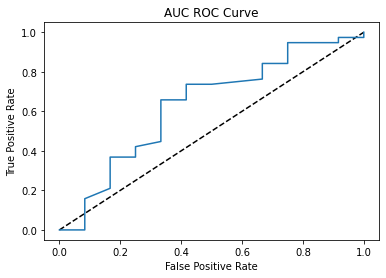

In [79]:
from sklearn.metrics import roc_curve
y_pred_prob = abc.predict_proba(x_test)[:,1] 
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.show()

In [80]:
import joblib
joblib.dump(abc,'Project5_Heart_Disease1.csv')

['Project5_Heart_Disease1.csv']